In [3]:
import os
from datetime import datetime, timedelta
from typing import Dict, List, Tuple
import pandas as pd
from dotenv import load_dotenv
from entsoe import EntsoePandasClient
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from prod.api.services.preprocessing_service import main as preprocess_data

data_past_transformed, data_future_transformed, data_target = (
            preprocess_data(target_date=pd.Timestamp("2025-08-19", tz="Europe/Paris"))
        )

data_past_transformed.shape, data_future_transformed.shape, data_target.shape

Creating cyclical features...


/home/ronan/.pyenv/versions/3.12.9/envs/power_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/ronan/.pyenv/versions/3.12.9/envs/power_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


((168, 21), (24, 27), (24,))

In [5]:
import keras as kr
from prod.api.config import API_MODELS_PATH

model = kr.models.load_model(API_MODELS_PATH / "model.keras")

model.summary()

2025-08-28 14:01:11.803134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-28 14:01:11.844028: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 14:01:12.100090: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 14:01:12.269416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756382472.424482    8409 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756382472.47

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 168, 21)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │      6,912 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 24, 27)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32)        │        128 │ lstm[0][0]        │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 24, 16)    │        448 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 16)    │         64 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 24, 32)    │          0 │ dropout[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 16)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 24, 48)    │          0 │ repeat_vector[0]… │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 24, 16)    │        784 │ concatenate[0][0] │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 16)    │         64 │ time_distributed… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 24, 16)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 24, 1)     │         17 │ dropout_2[0][0]   │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 24)        │          0 │ time_distributed… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,997 (97.65 KB)

 Trainable params: 8,289 (32.38 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 16,580 (64.77 KB)

In [7]:
if len(data_past_transformed.shape) == 2:
    data_past_transformed = np.expand_dims(data_past_transformed, axis=0)
if len(data_future_transformed.shape) == 2:
    data_future_transformed = np.expand_dims(data_future_transformed, axis=0)

data_past_transformed.shape, data_future_transformed.shape

((1, 168, 21), (1, 24, 27))

In [8]:
model.predict([data_past_transformed, data_future_transformed])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


array([[75.82692 , 70.79951 , 67.07649 , 64.297905, 65.69008 , 71.40683 ,
        78.35589 , 85.4276  , 80.077385, 67.15402 , 53.205956, 38.759544,
        30.219748, 24.873074, 24.03222 , 28.749899, 37.736423, 54.550613,
        73.207375, 88.859314, 96.17839 , 94.395256, 88.64825 , 78.53549 ]],
      dtype=float32)

In [ ]:
# 2. Load the model using the proper class method
model = LSTMModel.from_saved_model("model", model_dir=API_MODELS_PATH)

# 3. Make predictions
# Ensure data is in the right shape (samples, sequence_length, features)
if len(data_past_transformed.shape) == 2:
    data_past_transformed = np.expand_dims(data_past_transformed, axis=0)
if len(data_future_transformed.shape) == 2:
    data_future_transformed = np.expand_dims(data_future_transformed, axis=0)



In [ ]:
predictions = model.predict(data_past_transformed, data_future_transformed)

In [ ]:
from prod.api.services.entsoe_service import download_entsoe_data

df_past, df_future, df_target = download_entsoe_data(
    api_key=os.getenv('ENTSOE_API_KEY'),
    target_date=pd.Timestamp("2025-08-19", tz="Europe/Paris")
)

df_past.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2025-08-12 00:00:00+02:00 to 2025-08-18 23:00:00+02:00
Freq: h
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FR_price    168 non-null    float64
 1   ES_price    168 non-null    float64
 2   IT_price    168 non-null    float64
 3   CH_price    168 non-null    float64
 4   BE_price    168 non-null    float64
 5   DE_price    168 non-null    float64
 6   FR_ES_flow  168 non-null    float64
 7   ES_FR_flow  168 non-null    float64
 8   FR_IT_flow  168 non-null    float64
 9   IT_FR_flow  168 non-null    float64
 10  FR_CH_flow  168 non-null    float64
 11  CH_FR_flow  168 non-null    float64
 12  FR_BE_flow  168 non-null    float64
 13  BE_FR_flow  168 non-null    float64
 14  FR_DE_flow  168 non-null    float64
 15  DE_FR_flow  168 non-null    float64
 16  FR_GB_flow  168 non-null    float64
 17  GB_FR_flow  168 non-null    float64
dtypes: float64(18

In [10]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2025-08-19 00:00:00+02:00 to 2025-08-19 23:00:00+02:00
Freq: h
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FR_Load_forecast           24 non-null     float64
 1   FR_Solar_forecast          24 non-null     float64
 2   FR_Wind_Offshore_forecast  24 non-null     float64
 3   FR_Wind_Onshore_forecast   24 non-null     float64
 4   ES_Load_forecast           24 non-null     float64
 5   ES_Solar_forecast          24 non-null     float64
 6   ES_Wind_Onshore_forecast   24 non-null     float64
 7   IT_Load_forecast           24 non-null     float64
 8   IT_Solar_forecast          24 non-null     float64
 9   IT_Wind_Onshore_forecast   24 non-null     float64
 10  CH_Load_forecast           24 non-null     float64
 11  CH_Solar_forecast          24 non-null     float64
 12  CH_Wind_Onshore_forecast   24 non-null     float64

In [13]:
df_target.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 24 entries, 2025-08-19 00:00:00+02:00 to 2025-08-19 23:00:00+02:00
Freq: h
Series name: None
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [14]:
from api.services.preprocessing_service import main

data_past_transformed, data_future_transformed, data_target = main(
    target_date=pd.Timestamp("2025-08-19", tz="Europe/Paris")
)

Creating cyclical features...


/home/ronan/.pyenv/versions/3.12.9/envs/power_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/ronan/.pyenv/versions/3.12.9/envs/power_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [11]:
data_past_transformed.shape

(168, 21)

In [12]:
data_future_transformed.shape

(24, 27)

In [3]:
# 2. Load the model
from scripts.config import API_MODELS_PATH
from scripts.model_lstm import LSTMModel
import tensorflow as tf

# 2. Load the model using the proper class method
model = LSTMModel.from_saved_model("model", model_dir=API_MODELS_PATH)

# 3. Make predictions
# Ensure data is in the right shape (samples, sequence_length, features)
if len(data_past_transformed.shape) == 2:
    data_past_transformed = np.expand_dims(data_past_transformed, axis=0)
if len(data_future_transformed.shape) == 2:
    data_future_transformed = np.expand_dims(data_future_transformed, axis=0)

predictions = model.predict(data_past_transformed, data_future_transformed)

predictions

2025-08-27 14:52:31.005291: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-27 14:52:31.029883: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-27 14:52:31.227574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-27 14:52:31.397241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756299151.530824    7205 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756299151.57

array([[75.82692 , 70.79951 , 67.07649 , 64.297905, 65.69008 , 71.40683 ,
        78.35589 , 85.4276  , 80.077385, 67.15402 , 53.205956, 38.759544,
        30.219748, 24.873074, 24.03222 , 28.749899, 37.736423, 54.550613,
        73.207375, 88.859314, 96.17839 , 94.395256, 88.64825 , 78.53549 ]],
      dtype=float32)

In [4]:

# 4. Convert predictions to list and return
predictions_list = predictions.flatten().tolist()
predictions_list

[75.82691955566406,
 70.79950714111328,
 67.07649230957031,
 64.29790496826172,
 65.69007873535156,
 71.40682983398438,
 78.35588836669922,
 85.42759704589844,
 80.07738494873047,
 67.15402221679688,
 53.205955505371094,
 38.759544372558594,
 30.21974754333496,
 24.87307357788086,
 24.0322208404541,
 28.74989891052246,
 37.73642349243164,
 54.55061340332031,
 73.2073745727539,
 88.85931396484375,
 96.17839050292969,
 94.39525604248047,
 88.64824676513672,
 78.53549194335938]

In [15]:
data_target.shape

(24,)

In [16]:
data_target.tolist()

[93.04,
 76.5,
 71.81,
 66.46,
 65.51,
 75.06,
 85.15,
 95.02,
 98.05,
 88.57,
 69.64,
 43.23,
 30.0,
 29.14,
 30.91,
 40.54,
 58.18,
 63.33,
 63.0,
 88.97,
 97.74,
 98.04,
 98.0,
 83.76]

In [ ]:
actual_prices = data_target[:-1].tolist()
actual_prices

(1, 24)

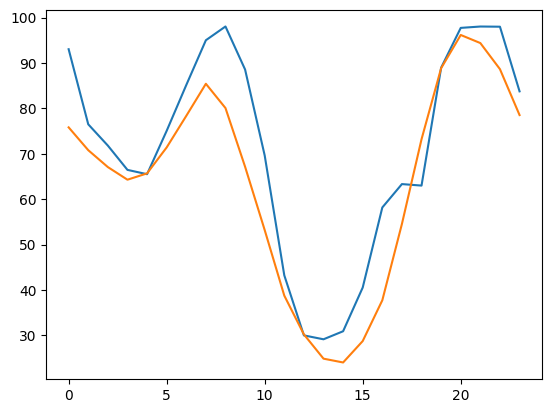

In [29]:
import matplotlib.pyplot as plt
plt.plot(actual_prices)
plt.plot(predictions_list)